In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("cause_of_deaths dataset.csv")
df.head(10)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
5,Afghanistan,AFG,1995,3102,1225,394,3131,175,1881,2969,...,2248,3974,467,3087,6211,6823,3076,5843,434,3946
6,Afghanistan,AFG,1996,3193,1239,398,3175,175,1969,3331,...,2298,4041,485,3130,6446,7000,3133,5966,450,4098
7,Afghanistan,AFG,1997,3304,1253,402,3250,240,2078,3028,...,2347,4094,504,3203,6677,7168,3200,6096,469,4252
8,Afghanistan,AFG,1998,3281,1267,405,3193,563,2098,3098,...,2388,4120,505,3145,6683,7287,3231,6154,472,4310
9,Afghanistan,AFG,1999,3200,1281,409,3115,468,2084,2917,...,2437,4150,502,3068,6603,7400,3247,6182,470,4332


There are some missing values in some of the columns. The colums with death counts will be filled with zero.

In [4]:
df

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139


In [5]:
df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [6]:
df.shape


(6120, 34)

In [7]:
df.dtypes

Country/Territory                             object
Code                                          object
Year                                           int64
Meningitis                                     int64
Alzheimer's Disease and Other Dementias        int64
Parkinson's Disease                            int64
Nutritional Deficiencies                       int64
Malaria                                        int64
Drowning                                       int64
Interpersonal Violence                         int64
Maternal Disorders                             int64
HIV/AIDS                                       int64
Drug Use Disorders                             int64
Tuberculosis                                   int64
Cardiovascular Diseases                        int64
Lower Respiratory Infections                   int64
Neonatal Disorders                             int64
Alcohol Use Disorders                          int64
Self-harm                                     

In [8]:
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


In [9]:
df.tail()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
6115,Zimbabwe,ZWE,2015,1439,754,215,3019,2518,770,1302,...,3176,2108,381,2990,2373,2751,1956,4202,632,146
6116,Zimbabwe,ZWE,2016,1457,767,219,3056,2050,801,1342,...,3259,2160,393,3027,2436,2788,1962,4264,648,146
6117,Zimbabwe,ZWE,2017,1460,781,223,2990,2116,818,1363,...,3313,2196,398,2962,2473,2818,2007,4342,654,144
6118,Zimbabwe,ZWE,2018,1450,795,227,2918,2088,825,1396,...,3381,2240,400,2890,2509,2849,2030,4377,657,139
6119,Zimbabwe,ZWE,2019,1450,812,232,2884,2068,827,1434,...,3460,2292,405,2855,2554,2891,2065,4437,662,136


In [10]:
df.sample(7)

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
2118,Greenland,GRL,2008,1,5,3,1,0,5,6,...,5,5,1,0,3,27,8,21,2,0
2711,Jordan,JOR,1996,72,199,56,15,0,115,138,...,892,535,60,12,777,485,288,523,143,20
4910,Slovakia,SVK,2010,24,1571,333,7,0,160,146,...,724,686,30,5,534,1093,1771,2991,69,2
4985,Somalia,SOM,2013,4390,375,111,8179,2863,832,1961,...,2181,1569,547,8031,3083,3393,3145,5004,563,1055
4035,Norway,NOR,2005,30,2146,402,31,0,68,36,...,733,626,25,26,284,2302,351,1377,73,2
5509,Tokelau,TKL,2009,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1450,Democratic Republic of Congo,COD,2000,11422,2038,524,18730,92188,2982,2694,...,7353,5579,1235,18199,24142,14952,10431,17955,1519,2047


In [11]:
df.isnull().sum()

Country/Territory                             0
Code                                          0
Year                                          0
Meningitis                                    0
Alzheimer's Disease and Other Dementias       0
Parkinson's Disease                           0
Nutritional Deficiencies                      0
Malaria                                       0
Drowning                                      0
Interpersonal Violence                        0
Maternal Disorders                            0
HIV/AIDS                                      0
Drug Use Disorders                            0
Tuberculosis                                  0
Cardiovascular Diseases                       0
Lower Respiratory Infections                  0
Neonatal Disorders                            0
Alcohol Use Disorders                         0
Self-harm                                     0
Exposure to Forces of Nature                  0
Diarrheal Diseases                      

In [12]:
df.describe()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
count,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,...,6120.000000,6120.000000,6120.000000,6120.000000,6120.000000,6.120000e+03,6120.000000,6120.000000,6120.000000,6120.000000
mean,2004.500000,1719.701307,4864.189379,1173.169118,2253.600000,4140.960131,1683.333170,2083.797222,1262.589216,5941.898529,...,5138.704575,4724.132680,425.013399,1965.994281,5930.795588,1.709237e+04,6124.072059,10725.267157,588.711438,618.429902
std,8.656149,6672.006930,18220.659072,4616.156238,10483.633601,18427.753137,8877.018366,6917.006075,6057.973183,21011.962487,...,16773.081040,16470.429969,2022.640521,8255.999063,24097.784291,1.051572e+05,20688.118580,37228.051096,2128.595120,4186.023497
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,15.000000,90.000000,27.000000,9.000000,0.000000,34.000000,40.000000,5.000000,11.000000,...,236.000000,145.750000,6.000000,5.000000,174.750000,2.890000e+02,154.000000,284.000000,17.000000,2.000000
50%,2004.500000,109.000000,666.500000,164.000000,119.000000,0.000000,177.000000,265.000000,54.000000,136.000000,...,1087.000000,822.000000,52.500000,92.000000,966.500000,1.689000e+03,1210.000000,2185.000000,126.000000,15.000000
75%,2012.000000,847.250000,2456.250000,609.250000,1167.250000,393.000000,698.000000,877.000000,734.000000,1879.000000,...,2954.000000,2922.500000,254.000000,1042.500000,3435.250000,5.249750e+03,3547.250000,6080.000000,450.000000,160.000000
max,2019.000000,98358.000000,320715.000000,76990.000000,268223.000000,280604.000000,153773.000000,69640.000000,107929.000000,305491.000000,...,273089.000000,222922.000000,30883.000000,202241.000000,329237.000000,1.366039e+06,270037.000000,464914.000000,25876.000000,64305.000000


In [13]:
df.skew()

C:\Users\dell\AppData\Local\Temp\ipykernel_592\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Year                                           0.000000
Meningitis                                     8.248599
Alzheimer's Disease and Other Dementias        8.695288
Parkinson's Disease                            9.321242
Nutritional Deficiencies                      14.863496
Malaria                                        9.159105
Drowning                                      10.553901
Interpersonal Violence                         5.777146
Maternal Disorders                            12.278358
HIV/AIDS                                       6.610169
Drug Use Disorders                            13.367100
Tuberculosis                                  12.022406
Cardiovascular Diseases                        9.411914
Lower Respiratory Infections                   9.036604
Neonatal Disorders                            10.447536
Alcohol Use Disorders                          9.253511
Self-harm                                      8.973653
Exposure to Forces of Nature                  34

<AxesSubplot:>

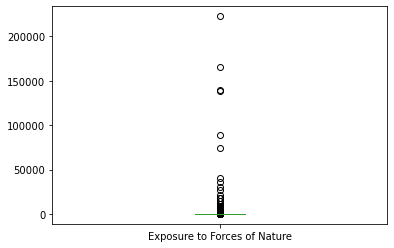

In [14]:
df['Exposure to Forces of Nature'].plot.box()

In [15]:
df.keys()

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis'],
      dtype='object')

In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

A part of the data (218 rows) is filled with NaN except the Terrorism column. One can choose to fill those NaN cells with 0, or drop those rows which leads to lost of information for terrorism counts for that particular year/country pairs of 218 rows. We will choose the first option

In [17]:
df[df.isnull()].sum()

Country/Territory                               0
Code                                            0
Year                                          0.0
Meningitis                                    0.0
Alzheimer's Disease and Other Dementias       0.0
Parkinson's Disease                           0.0
Nutritional Deficiencies                      0.0
Malaria                                       0.0
Drowning                                      0.0
Interpersonal Violence                        0.0
Maternal Disorders                            0.0
HIV/AIDS                                      0.0
Drug Use Disorders                            0.0
Tuberculosis                                  0.0
Cardiovascular Diseases                       0.0
Lower Respiratory Infections                  0.0
Neonatal Disorders                            0.0
Alcohol Use Disorders                         0.0
Self-harm                                     0.0
Exposure to Forces of Nature                  0.0


All diseases have "(death)" at the end, take them off

In [18]:
df.columns = [i.split("(")[0].strip() for i in df.columns]

Replace null/Nan values with 0

In [19]:
df.iloc[:,2:] = df.iloc[:,2:].replace({np.nan: 0})

In [20]:
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6120 entries, 0 to 6119
Data columns (total 34 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   Country/Territory                           6120 non-null   object
 1   Code                                        6120 non-null   object
 2   Year                                        6120 non-null   int64 
 3   Meningitis                                  6120 non-null   int64 
 4   Alzheimer's Disease and Other Dementias     6120 non-null   int64 
 5   Parkinson's Disease                         6120 non-null   int64 
 6   Nutritional Deficiencies                    6120 non-null   int64 
 7   Malaria                                     6120 non-null   int64 
 8   Drowning                                    6120 non-null   int64 
 9   Interpersonal Violence                      6120 non-null   int64 
 10  Maternal Disorders      

Values in the death count cells are floating numbers, lets convert them to integers as these values represent counts of death

In [21]:
df.iloc[:,4:] = df.iloc[:,4:].astype(int)
df.head()

,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Diabetes Mellitus,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,2108,3709,338,2054,4154,5945,2673,5005,323,2985
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,2120,3724,351,2119,4472,6050,2728,5120,332,3092
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,2153,3776,386,2404,5106,6223,2830,5335,360,3325
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,2195,3862,425,2797,5681,6445,2943,5568,396,3601
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,2231,3932,451,3038,6001,6664,3027,5739,420,3816


# Exploratory Data Analysis

### Top 10 causes of death for Turkey in 2017 (latest available year)

<AxesSubplot:>

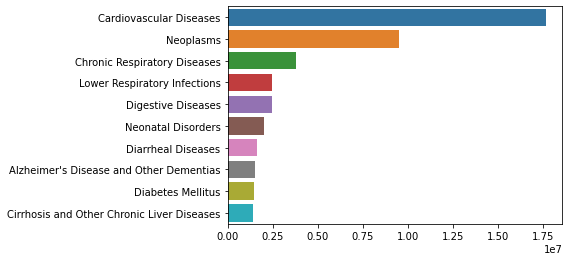

In [22]:
turkey_2017 = df.groupby("Year").sum().loc[2017].sort_values(ascending=False)
sns.barplot(x=turkey_2017.values[:10],y=turkey_2017.index[:10],orient="h")

Display their percentage in pie graph:

Almost 4 out 10 deaths in Turkey are caused by Cardiovasculare diseases in 2017

Text(0, 0.5, '')

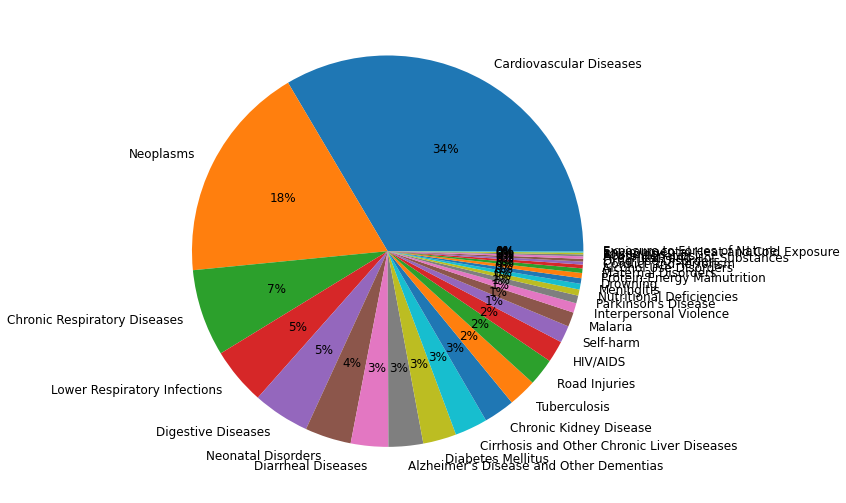

In [23]:
turkey_2017_pie = turkey_2017[turkey_2017>2000]
turkey_2017_pie["Others"] = sum(turkey_2017[turkey_2017<=2000])
turkey_2017_pie.plot(kind="pie",autopct="%.0f%%",figsize=(9,9),fontsize=12)
plt.ylabel("")

## Top 20 countries which suffered from terrorism the most

Our dataset Entity column contains a mix of country, continent, region, territory information too such as Sub-Saharan Africa, South America etc. For this graph we are only interested in the countries

Text(0.5, 0, 'Total Deaths 1990-2017')

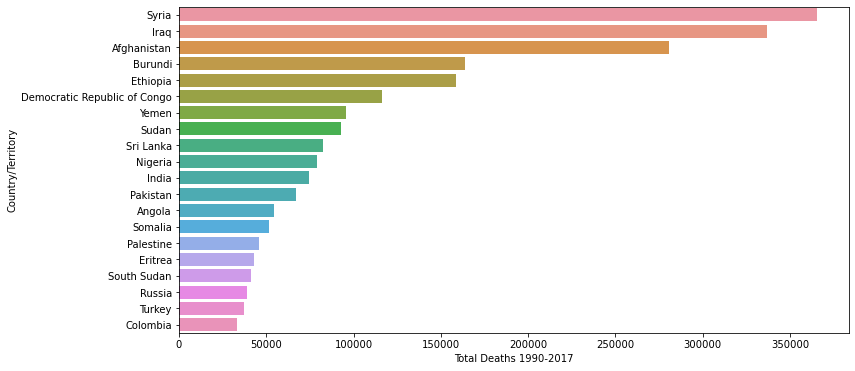

In [24]:
country_terrorism = df[df.Code.notnull()].groupby("Country/Territory").sum()["Conflict and Terrorism"].sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=country_terrorism[1:21].values,y=country_terrorism[1:21].index,orient="h")
plt.xlabel("Total Deaths 1990-2017")

## Deadliest Year

Deadliest year appears to be 2017 in terms of death counts, however this was due to the increase of the world population each year. We need to check death rate per year.

Text(0, 0.5, '# of Deaths')

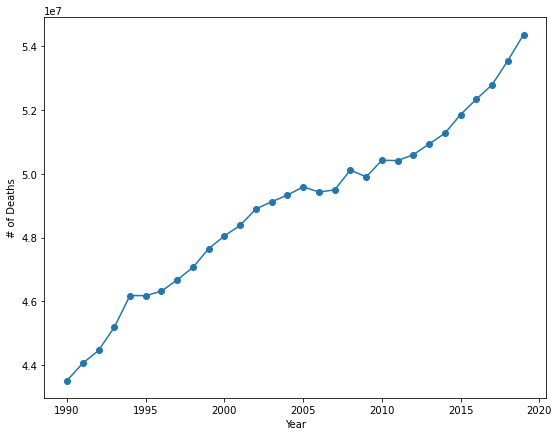

In [25]:
df["total_death"] = df.iloc[:,3:].sum(axis=1)
death_by_year = df.groupby("Year").sum()["total_death"]

fig = plt.figure(figsize=(9,7))
death_by_year.plot(marker="o")
plt.ylabel("# of Deaths")

Let's use the world population per year which we got from the internet and plot year vs death rate (%):

----Death rate has been going down every year and showing signs that 3.35% levels could be the plateau for this metric

----1994 was the deadliest year with almost 4% of the population was died

ValueError: operands could not be broadcast together with shapes (30,) (28,) 

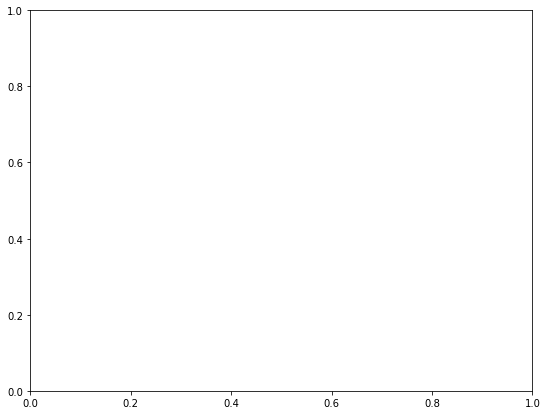

In [26]:
world_population = "7547858925	7464022049	7379797139	7295290765	7210581976	7125828059	7041194301	6956823603	6872767093	6789088686	6705946610	6623517833	6541907027	6461159389	6381185114	6301773188	6222626606	6143493823	6064239055	5984793942	5905045788	5824891951	5744212979	5663150427	5581597546	5498919809	5414289444	5327231061".split("	")
world_population = pd.Series(world_population).astype('int64').sort_values(ascending=True).reset_index(drop=True)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111)
ax.plot(death_by_year.index,100*death_by_year.values/world_population,marker="o")
ax.annotate("1994",xy=(1994,3.87), xytext=(1993,3.7),
                   arrowprops=dict(facecolor="sandybrown",shrink=0.05))
plt.ylabel("# of Death / Population (%)")

<AxesSubplot:ylabel='Year'>

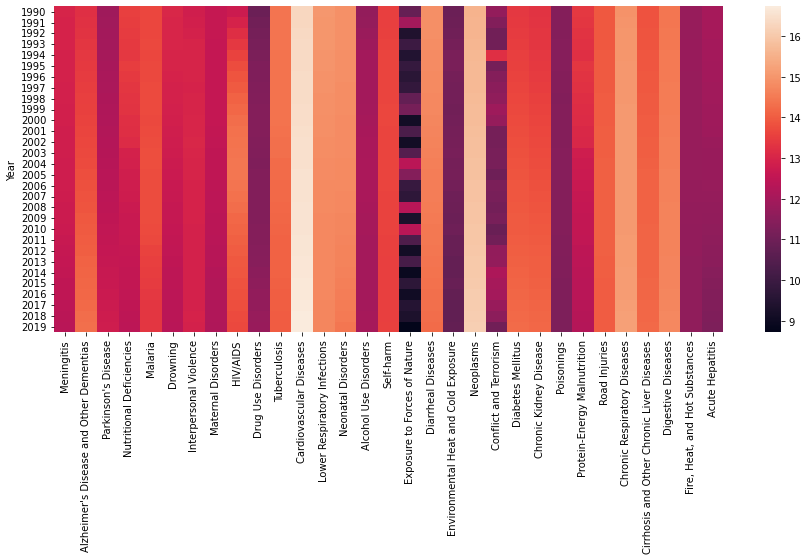

In [27]:
plt.figure(figsize=(15,6))
sns.heatmap(np.log(df.drop(["Country/Territory","total_death"],axis=1).groupby("Year").sum()).replace(-np.inf,10))

In [29]:
df.corr()

,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,total_death
Year,1.000000,-0.043288,0.083710,0.068756,-0.078266,-0.015964,-0.040910,-0.001122,-0.027460,0.022964,...,0.074970,-0.007414,-0.088377,0.005982,0.008645,0.031126,0.025539,-0.014134,-0.032604,0.015163
Meningitis,-0.043288,1.000000,0.216713,0.351668,0.760851,0.755261,0.576347,0.447242,0.899507,0.411881,...,0.562013,0.381899,0.738272,0.511316,0.516440,0.665212,0.684047,0.724751,0.813554,0.641319
Alzheimer's Disease and Other Dementias,0.083710,0.216713,1.000000,0.950785,0.193209,0.031290,0.599403,0.429622,0.200315,0.101628,...,0.814841,0.719373,0.185030,0.760421,0.728337,0.686722,0.703813,0.551121,0.263559,0.783616
Parkinson's Disease,0.068756,0.351668,0.950785,1.000000,0.313033,0.084109,0.753663,0.485528,0.356394,0.145521,...,0.911376,0.818444,0.295749,0.897982,0.882246,0.825476,0.839807,0.699626,0.438842,0.910980
Nutritional Deficiencies,-0.078266,0.760851,0.193209,0.313033,1.000000,0.411149,0.596367,0.407065,0.881740,0.241247,...,0.504551,0.298918,0.991700,0.465285,0.472233,0.586889,0.626332,0.665677,0.820830,0.582968
Malaria,-0.015964,0.755261,0.031290,0.084109,0.411149,1.000000,0.195839,0.184469,0.523581,0.424471,...,0.198686,0.169424,0.416539,0.178822,0.146132,0.271206,0.282995,0.335181,0.362693,0.277914
Drowning,-0.040910,0.576347,0.599403,0.753663,0.596367,0.195839,1.000000,0.539339,0.623558,0.171108,...,0.781125,0.790391,0.579360,0.894074,0.936633,0.846058,0.869528,0.823063,0.711640,0.901813
Interpersonal Violence,-0.001122,0.447242,0.429622,0.485528,0.407065,0.184469,0.539339,1.000000,0.449551,0.315642,...,0.589217,0.471659,0.396216,0.574467,0.494280,0.606565,0.629069,0.679620,0.453349,0.604067
Maternal Disorders,-0.027460,0.899507,0.200315,0.356394,0.881740,0.523581,0.623558,0.449551,1.000000,0.336267,...,0.611581,0.303751,0.838607,0.533423,0.548051,0.713392,0.741447,0.788030,0.956576,0.664417
HIV/AIDS,0.022964,0.411881,0.101628,0.145521,0.241247,0.424471,0.171108,0.315642,0.336267,1.000000,...,0.245579,0.165169,0.252876,0.229103,0.181262,0.270776,0.273079,0.324672,0.269876,0.273981


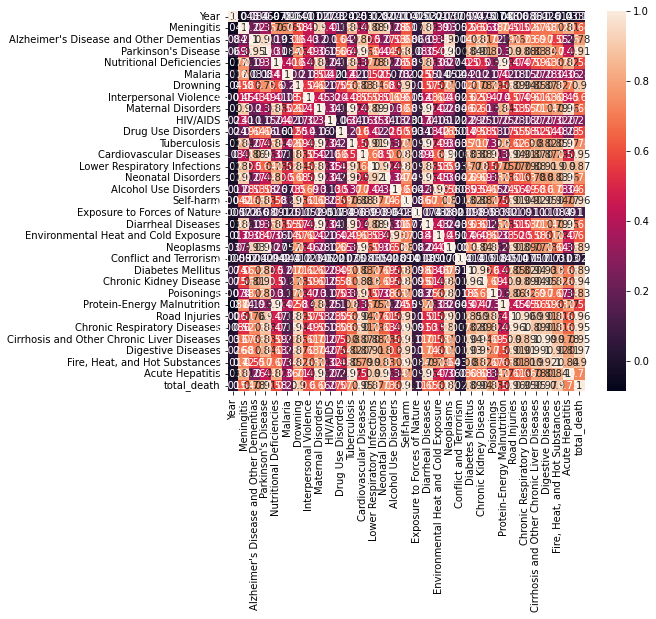

In [28]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2a303412bb0>,
 'caps': [<matplotlib.lines.Line2D at 0x2a303426190>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a3034128e0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a303426730>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a303426a00>],
 'means': []}

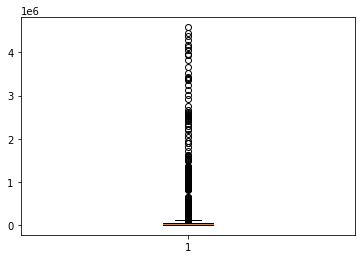

In [30]:
#Boxplot
plt.boxplot(df['Cardiovascular Diseases'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x2a3032fa370>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2a3033034c0>,
 'cmins': <matplotlib.collections.LineCollection at 0x2a303303bb0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2a303303f70>}

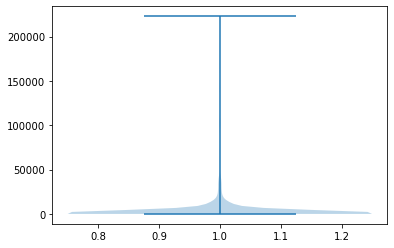

In [31]:
plt.violinplot(df['Chronic Kidney Disease'])

In [33]:
x=df['Chronic Kidney Disease']
y=df['Cardiovascular Diseases']

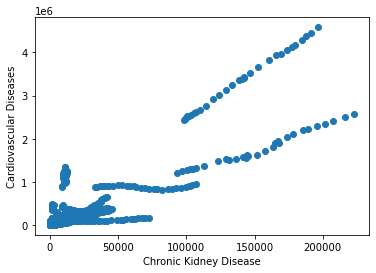

In [34]:
plt.scatter(x,y)
plt.xlabel('Chronic Kidney Disease')
plt.ylabel('Cardiovascular Diseases')
plt.show()

In [35]:
x=['Country/Territory']
y=['Cardiovascular Diseases']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

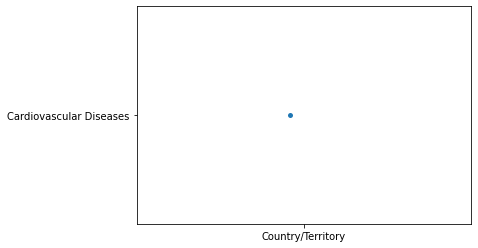

In [36]:
sns.stripplot(x,y)